In [2]:
!pip install pandas

  Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.2.3-cp310-cp310-win_amd64.whl (11.6 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pand

In [3]:
!pip install seaborn
!pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl.metadata (104 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.57.0-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pillow-11.2.1-cp310-cp310-win_amd64.whl (2.7 MB)
U

In [5]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp310-cp310-win_amd64.whl (11.1 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scipy-1.15.2-cp310-cp310-win_amd64.whl (41.2 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- -----------------

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import SGD

In [7]:
df=pd.read_csv("tesla_stocks.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [8]:

print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [9]:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3296,2023-08-03,252.039993,260.489990,252.000000,259.320007,259.320007,97569100
3297,2023-08-04,260.970001,264.769989,253.110001,253.860001,253.860001,99242600
3298,2023-08-07,251.449997,253.649994,242.759995,251.449997,251.449997,111097900
3299,2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200


In [10]:
close_prices = df['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_prices)

In [12]:
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 10
X, y = create_sequences(scaled_close, time_steps)


In [13]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mse')

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


D:\folder desktop\ttttt\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0043 - val_loss: 0.1015
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 0.0399
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0717e-04 - val_loss: 0.0261
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1339e-04 - val_loss: 0.0221
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1766e-04 - val_loss: 0.0206
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3266e-04 - val_loss: 0.0195
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2344e-04 - val_loss: 0.0200
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.8217e-05 - val_loss: 0.0203
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0606e-04 - val_loss: 0.0179
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.6948e-05 - val_loss: 0.0205
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4485e-04 - val_loss: 0.0194
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [14]:
y_pred = model.predict(X_test)
y_pred_actual = scaler.inverse_transform(y_pred)
y_test_actual = scaler.inverse_transform(y_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


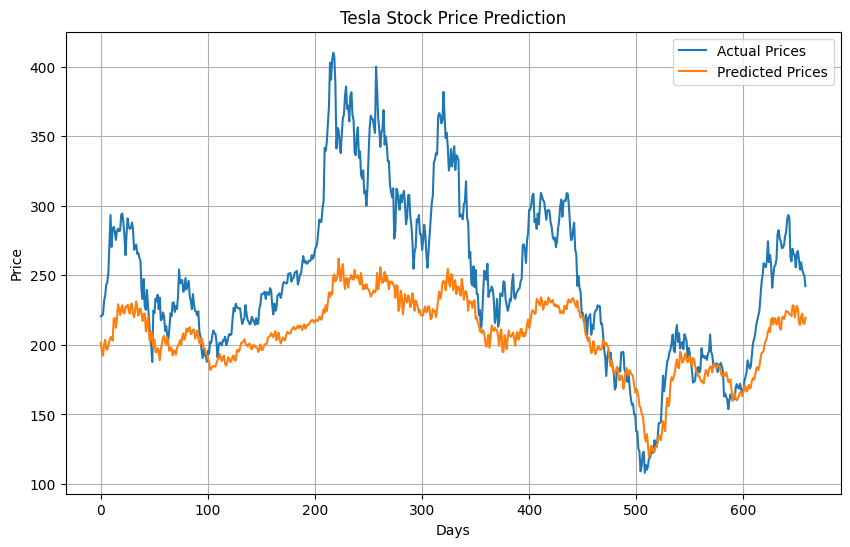

In [15]:

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Prices')
plt.plot(y_pred_actual, label='Predicted Prices')
plt.title("Tesla Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()